In [23]:
#Basic scientific python libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from sklearn import preprocessing



In [24]:
df = pd.read_csv("weatherAUS.csv")

In [25]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [26]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [27]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [28]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [29]:
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

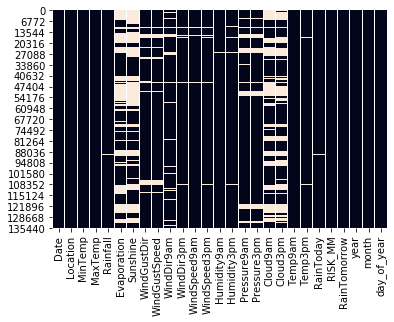

In [33]:

sns.heatmap(df.isnull(), cbar=False)


In [34]:
df.Evaporation.value_counts()

4.0     3282
8.0     2574
2.2     2057
2.0     1996
2.6     1975
        ... 
42.4       1
56.2       1
36.8       1
16.5       1
44.0       1
Name: Evaporation, Length: 356, dtype: int64

In [35]:
df.Evaporation.sort_values()

74658     0.0
35304     0.0
57022     0.0
83398     0.0
63636     0.0
         ... 
142188    NaN
142189    NaN
142190    NaN
142191    NaN
142192    NaN
Name: Evaporation, Length: 142193, dtype: float64

In [36]:
df.loc[(df.RainToday != "Yes"),'RainToday']=0
df.loc[(df.RainToday  ==  "Yes"),'RainToday']=1
df.loc[(df.RainTomorrow != "Yes"),'RainTomorrow']=0
df.loc[(df.RainTomorrow  ==  "Yes"),'RainTomorrow']=1

# For better visualization of the relationship creating a dataset of a particuar location for a particular month 

In [37]:
df1=df[df['Location']=='Albury']
df2=df1[df1['year']==2015]
df3=df2[df2['month']==7]


In [38]:
df3

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day_of_year
2290,2015-07-01,Albury,2.9,10.6,0.0,NaN,NaN,W,19.0,ENE,...,8.0,NaN,5.3,10.1,0,0.8,0,2015,7,182
2291,2015-07-02,Albury,4.6,12.1,0.8,NaN,NaN,WSW,50.0,N,...,NaN,1.0,6.9,11.3,0,0.8,0,2015,7,183
2292,2015-07-03,Albury,-2.1,11.0,0.8,NaN,NaN,NW,20.0,NaN,...,NaN,4.0,2.5,10.8,0,0.0,0,2015,7,184
2293,2015-07-04,Albury,1.1,11.6,0.0,NaN,NaN,W,24.0,NaN,...,8.0,8.0,2.6,10.3,0,0.0,0,2015,7,185
2294,2015-07-05,Albury,0.7,11.8,0.0,NaN,NaN,SSE,13.0,NaN,...,8.0,8.0,3.6,11.6,0,0.0,0,2015,7,186
2295,2015-07-06,Albury,3.6,10.0,0.0,NaN,NaN,WSW,17.0,NaN,...,8.0,8.0,8.2,9.7,0,0.0,0,2015,7,187
2296,2015-07-07,Albury,4.8,14.8,0.0,NaN,NaN,SSE,20.0,SE,...,NaN,NaN,7.6,13.7,0,0.0,0,2015,7,188
2297,2015-07-08,Albury,0.1,14.8,0.0,NaN,NaN,E,13.0,SE,...,NaN,NaN,4.5,14.1,0,0.0,0,2015,7,189
2298,2015-07-09,Albury,-0.5,13.2,0.0,NaN,NaN,SE,17.0,NaN,...,3.0,2.0,3.3,12.6,0,1.8,1,2015,7,190
2299,2015-07-10,Albury,3.3,14.2,1.8,NaN,NaN,NE,24.0,SE,...,8.0,8.0,9.0,13.0,1,2.4,1,2015,7,191


# All these years  No of rainy days  Vs Months -  Albury

In [39]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


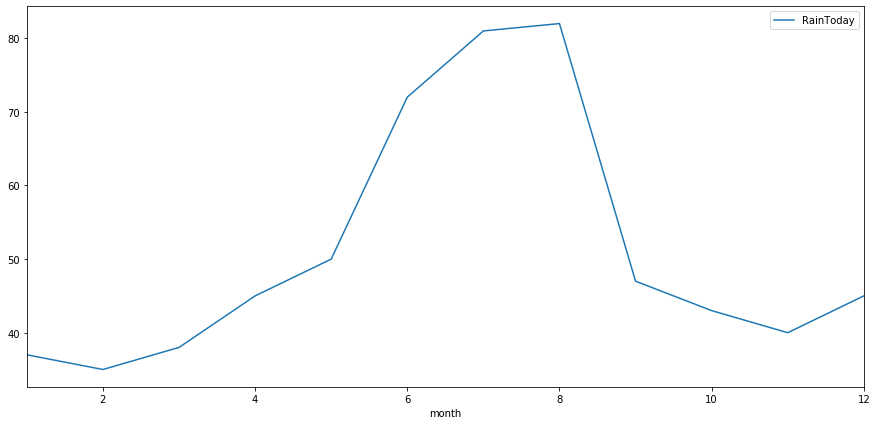

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(['month']).sum()['RainToday'].plot(ax=ax)
#df1.groupby(['month']).mean()['Humidity3pm'].plot(ax=ax)
leg = ax.legend();


# In the months June,July & August high no of rainy days

# Plotting daily variables to see the relationship with the following day rainfall

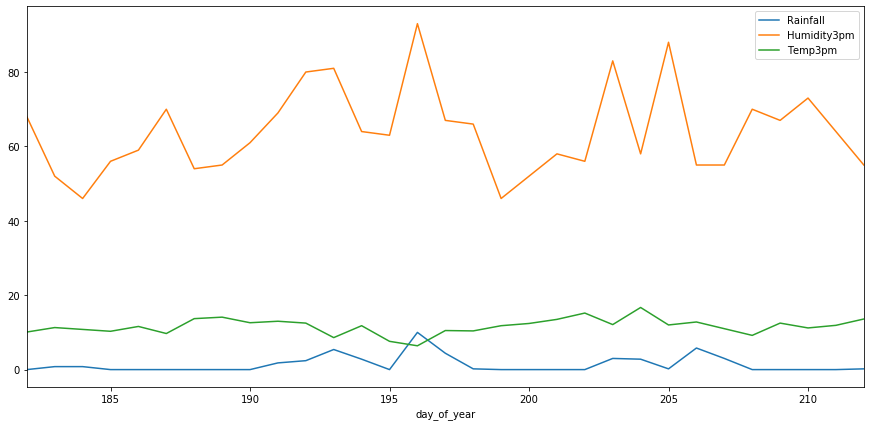

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df3.groupby(['day_of_year']).mean()['Humidity3pm'].plot()
df3.groupby(['day_of_year']).mean()['Temp3pm'].plot()
leg = ax.legend();

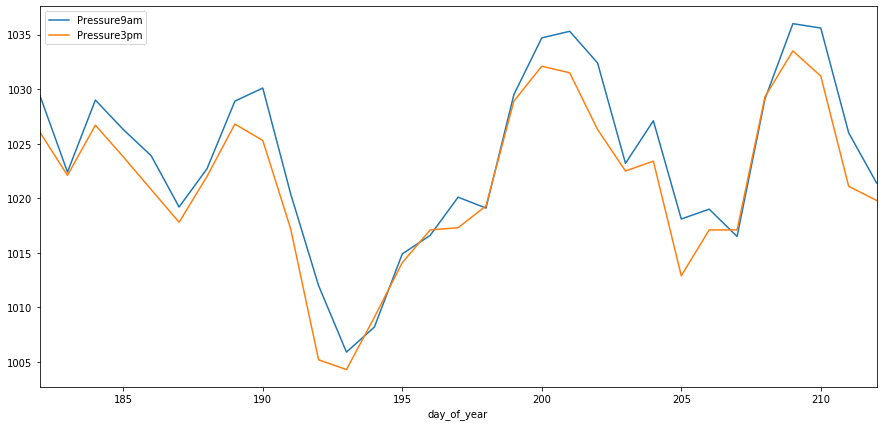

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
#df3.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df3.groupby(['day_of_year']).mean()['Pressure9am'].plot()
df3.groupby(['day_of_year']).mean()['Pressure3pm'].plot()
leg = ax.legend();

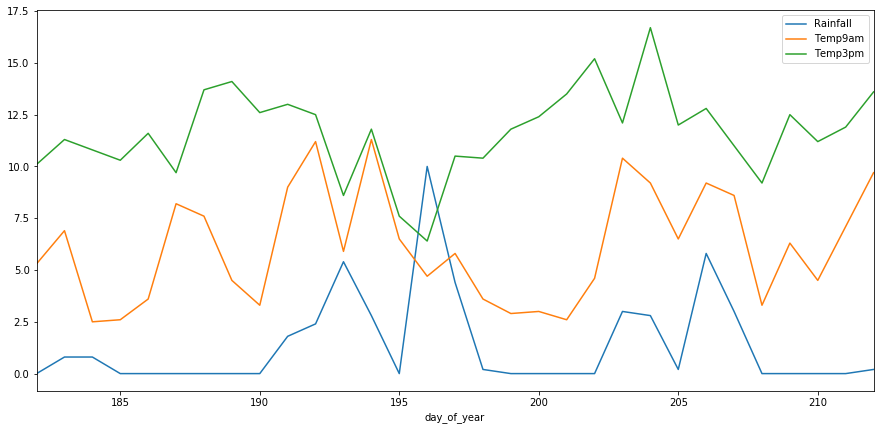

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df3.groupby(['day_of_year']).mean()['Temp9am'].plot()
df3.groupby(['day_of_year']).mean()['Temp3pm'].plot()
leg = ax.legend()

#  No of rainy days reported every year for Albury

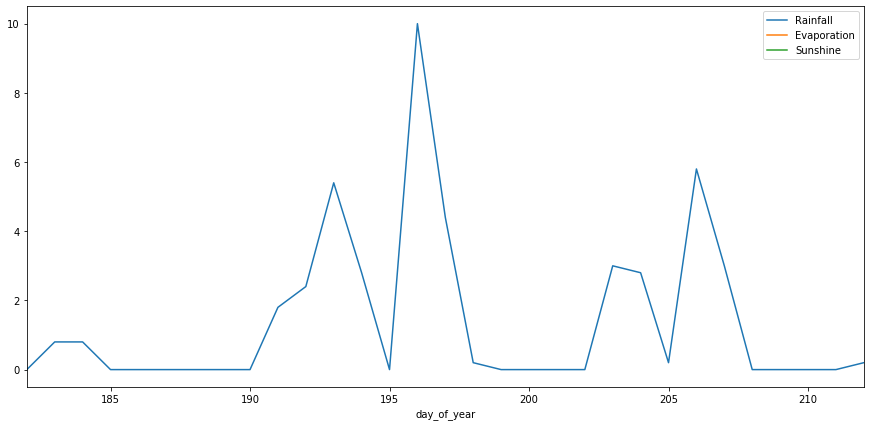

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df3.groupby(['day_of_year']).mean()['Evaporation'].plot()
df3.groupby(['day_of_year']).mean()['Sunshine'].plot()
leg = ax.legend()

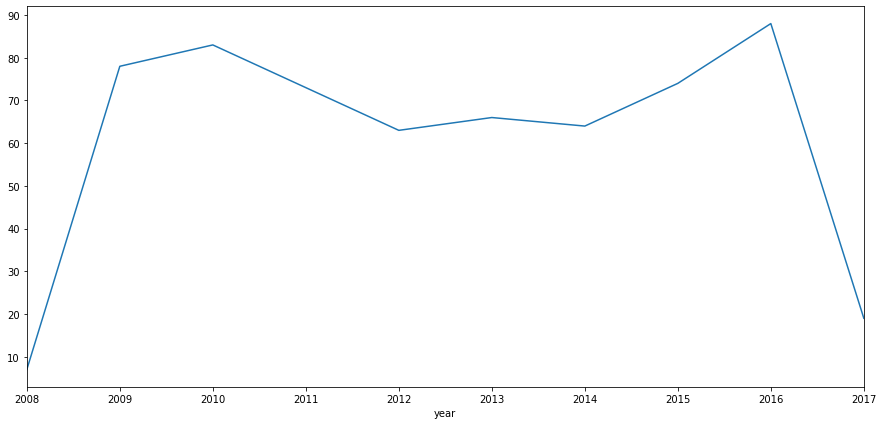

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(['year']).sum()['RainToday'].plot(ax=ax)

In [82]:
df4=df[df['Location']=='Perth']
df5=df4[df4['year']==2014]
df6=df5[df5['month']==7]


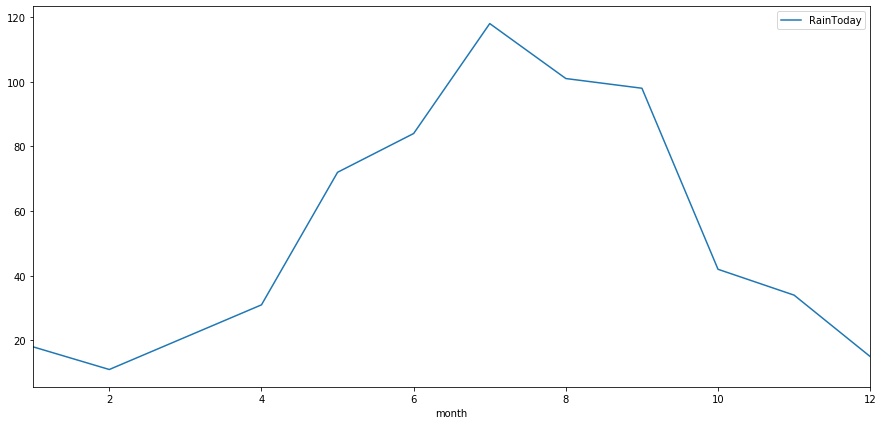

In [83]:
fig, ax = plt.subplots(figsize=(15,7))
df4.groupby(['month']).sum()['RainToday'].plot(ax=ax)
#df1.groupby(['month']).mean()['Humidity3pm'].plot(ax=ax)
leg = ax.legend();


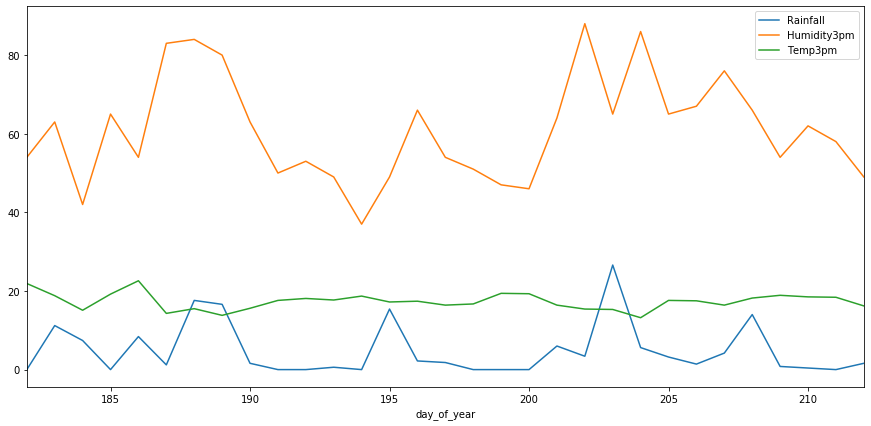

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
df6.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df6.groupby(['day_of_year']).mean()['Humidity3pm'].plot()
df6.groupby(['day_of_year']).mean()['Temp3pm'].plot()
leg = ax.legend();

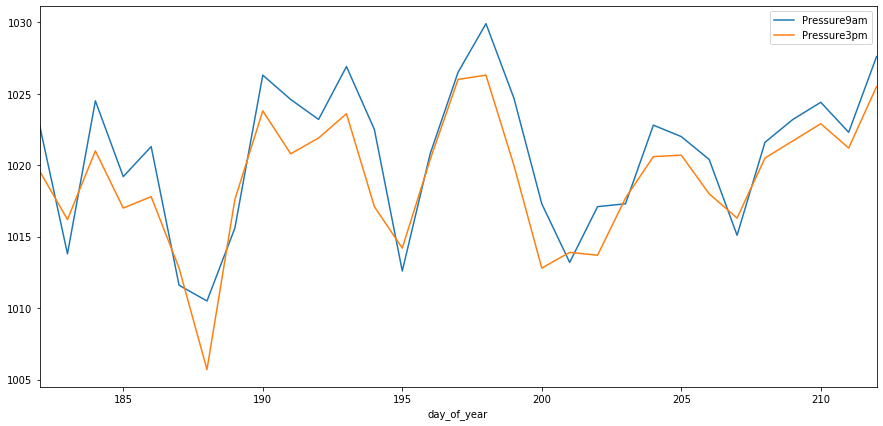

In [85]:
fig, ax = plt.subplots(figsize=(15,7))
#df6.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df6.groupby(['day_of_year']).mean()['Pressure9am'].plot()
df6.groupby(['day_of_year']).mean()['Pressure3pm'].plot()
leg = ax.legend();

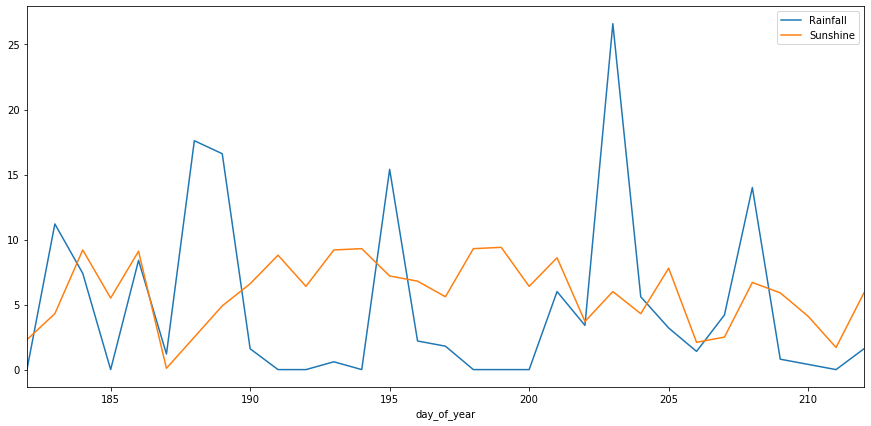

In [86]:
fig, ax = plt.subplots(figsize=(15,7))
df6.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df6.groupby(['day_of_year']).mean()['Sunshine'].plot()
#df6.groupby(['day_of_year']).mean()['Pressure3pm'].plot()
leg = ax.legend();

In [87]:

df3.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day_of_year
MinTemp,1.000000,0.083229,0.483604,NaN,NaN,0.387035,0.553976,0.389371,-0.284195,0.263750,...,0.473387,0.171293,0.868121,0.002075,0.646359,0.327569,0.329536,NaN,NaN,0.144151
MaxTemp,0.083229,1.000000,-0.266895,NaN,NaN,-0.084876,-0.122318,-0.079032,-0.050957,-0.349638,...,-0.155922,-0.156766,0.328344,0.962397,0.086903,-0.218808,0.017716,NaN,NaN,0.200630
Rainfall,0.483604,-0.266895,1.000000,NaN,NaN,0.253344,0.510866,0.263634,0.113488,0.463609,...,0.334659,-0.019811,0.307487,-0.332228,0.817830,0.260308,0.389613,NaN,NaN,0.062859
Evaporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,0.387035,-0.084876,0.253344,NaN,NaN,1.000000,0.563169,0.764392,-0.233909,0.138116,...,0.248416,-0.090049,0.429817,-0.184916,0.358459,0.282398,0.215064,NaN,NaN,0.148361
WindSpeed9am,0.553976,-0.122318,0.510866,NaN,NaN,0.563169,1.000000,0.581590,-0.317126,0.294489,...,0.335412,0.014256,0.565635,-0.233115,0.627827,0.216644,0.157815,NaN,NaN,0.136065
WindSpeed3pm,0.389371,-0.079032,0.263634,NaN,NaN,0.764392,0.581590,1.000000,-0.375679,0.017426,...,0.138765,-0.340838,0.414443,-0.180701,0.370009,0.195509,0.197003,NaN,NaN,0.112491
Humidity9am,-0.284195,-0.050957,0.113488,NaN,NaN,-0.233909,-0.317126,-0.375679,1.000000,0.335933,...,-0.025554,0.252248,-0.392704,-0.025501,0.027506,-0.097999,0.004921,NaN,NaN,-0.067789
Humidity3pm,0.263750,-0.349638,0.463609,NaN,NaN,0.138116,0.294489,0.017426,0.335933,1.000000,...,0.197863,0.504413,0.256247,-0.432080,0.388418,0.465202,0.467062,NaN,NaN,0.141790


# scatterplots to view the relationships for Albury

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


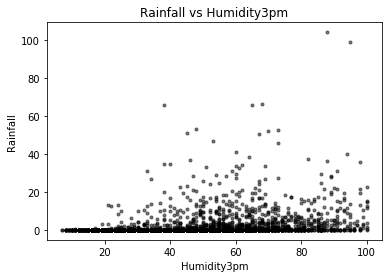

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


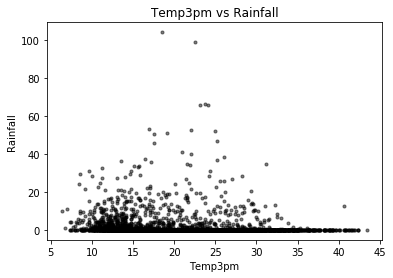

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


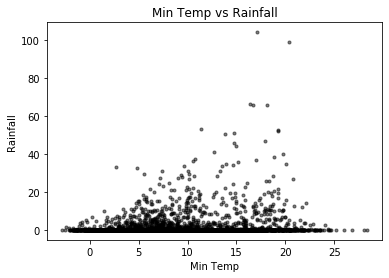

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


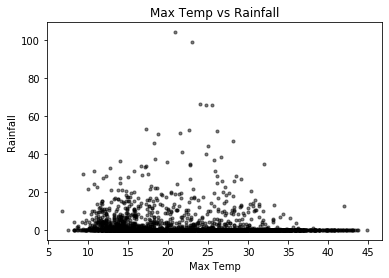

"\n['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',\n       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',\n       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',\n       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',\n       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],\n      dtype='object')\n      "

In [93]:

# Create data
N = 500
x = df1['Humidity3pm']
y = df1['Rainfall']
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Rainfall vs Humidity3pm')
plt.xlabel('Humidity3pm')
plt.ylabel('Rainfall')
plt.show()

z =  df1['Temp3pm']

aa = df1['MinTemp']
bb = df1['MaxTemp']

plt.scatter(z, y, s=area, c=colors, alpha=0.5)
plt.title('Temp3pm vs Rainfall')
plt.xlabel('Temp3pm')
plt.ylabel('Rainfall')
plt.show()


plt.scatter(aa, y, s=area, c=colors, alpha=0.5)
plt.title('Min Temp vs Rainfall')
plt.xlabel('Min Temp')
plt.ylabel('Rainfall')
plt.show()




plt.scatter(bb, y, s=area, c=colors, alpha=0.5)
plt.title('Max Temp vs Rainfall')
plt.xlabel('Max Temp')
plt.ylabel('Rainfall')
plt.show()


'''
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')
      '''